In [1]:
import pandas as pd
#Google colab does not have pickle
try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import seaborn as sns

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D,Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding,Concatenate
from keras.models import Model
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

     |████████████████████████████████| 133kB 8.5MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219255 sha256=5839b461cc6af1f03be99d1777945fa7701f393f54fa1aab4e3774f5888e4222
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [2]:

def load_data(randomize=False):
    try:
        with open("/content/drive/MyDrive/ML_Data/hyppi-train.pkl", "rb") as fh:
          df_train = pickle.load(fh)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open("/content/drive/MyDrive/ML_Data/hyppi-independent.pkl", "rb") as fh:
          df_test = pickle.load(fh)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test
df_train,df_test = load_data()

print('The data used will be:')
df_train

The data used will be:


,Human,Yersinia,Joined,label
0,"[M, K, D, K, Q, K, K, K, K, E, R, T, W, A, E, ...","[M, A, K, A, S, R, H, N, L, S, I, G, I, S, M, ...","[M, K, D, K, Q, K, K, K, K, E, R, T, W, A, E, ...",1
1,"[M, S, W, S, G, L, L, H, G, L, N, T, S, L, T, ...","[M, Q, H, V, T, G, S, K, R, R, L, I, G, W, V, ...","[M, S, W, S, G, L, L, H, G, L, N, T, S, L, T, ...",0
2,"[M, S, L, F, D, L, F, R, G, F, F, G, F, P, G, ...","[M, A, E, L, P, A, K, R, R, F, T, R, I, D, R, ...","[M, S, L, F, D, L, F, R, G, F, F, G, F, P, G, ...",1
3,"[M, A, V, A, P, R, L, F, G, G, L, C, F, R, F, ...","[M, R, I, F, A, I, S, C, S, S, Y, T, Y, C, Y, ...","[M, A, V, A, P, R, L, F, G, G, L, C, F, R, F, ...",0
4,"[M, S, T, I, Q, S, E, T, D, C, Y, D, I, I, E, ...","[M, S, Y, A, F, P, G, T, F, P, G, R, R, M, R, ...","[M, S, T, I, Q, S, E, T, D, C, Y, D, I, I, E, ...",0
...,...,...,...,...
6265,"[M, S, Y, F, G, E, H, F, W, G, E, K, N, H, G, ...","[M, I, T, T, D, G, N, S, A, V, A, S, V, A, Y, ...","[M, S, Y, F, G, E, H, F, W, G, E, K, N, H, G, ...",1
6266,"[M, T, V, G, K, S, S, K, M, L, Q, H, I, D, Y, ...","[M, S, Q, P, P, F, W, Q, Q, K, T, L, A, E, M, ...","[M, T, V, G, K, S, S, K, M, L, Q, H, I, D, Y, ...",1
6267,"[M, N, N, L, S, F, S, E, L, C, C, L, F, C, C, ...","[M, S, E, D, R, H, Q, Q, R, Q, Q, R, L, K, E, ...","[M, N, N, L, S, F, S, E, L, C, C, L, F, C, C, ...",0
6268,"[M, A, P, E, I, N, L, P, G, P, M, S, L, I, D, ...","[M, K, N, L, S, F, V, A, G, L, V, I, L, L, G, ...","[M, A, P, E, I, N, L, P, G, P, M, S, L, I, D, ...",1


Median length of Human sequence is 479


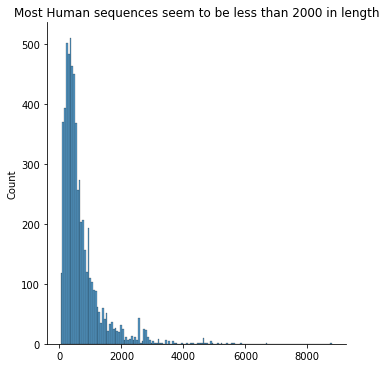

In [3]:
lengths = sorted(len(s) for s in df_train['Human'])
print("Median length of Human sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Human sequences seem to be less than 2000 in length")

Median length of Yersinia sequence is 336


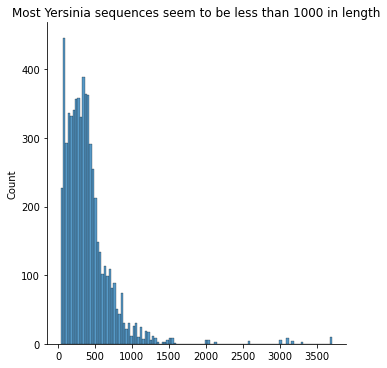

In [4]:
lengths = sorted(len(s) for s in df_train['Yersinia'])
print("Median length of Yersinia sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Yersinia sequences seem to be less than 1000 in length")

Median length of Joined sequence is 881


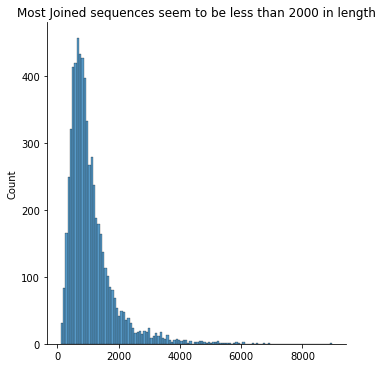

In [5]:
rows = df_train['Joined'].shape[0]
lengths = sorted(len(s) for s in df_train['Joined'])
print("Median length of Joined sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Joined sequences seem to be less than 2000 in length")

In [6]:
data1_1D_doubleip_pre,data2_1D_doubleip_pre,data1_test_1D_doubleip_pre,data2_test_1D_doubleip_pre,num_words_1D,MAX_SEQUENCE_LENGTH_1D_dIP,MAX_VOCAB_SIZE_1D = f.get_seq_data_doubleip(100,1000,df_train,df_test, pad='pre')

MAX_VOCAB_SIZE is 100
MAX_SEQUENCE_LENGTH is 1000
max sequences1_train length: 8797
min sequences1_train length: 41
median sequences1_train length: 479
max word index sequences1_train: 20
max sequences2_train length: 3710
min sequences2_train length: 35
median sequences2_train length: 336
max word index sequences2_train: 20
Found 20 unique tokens in tokenizer1.
Found 20 unique tokens in tokenizer2.
pre padding
Shape of data1 tensor: (6270, 1000)
Shape of data2 tensor: (6270, 1000)
max test_sequences1 length: 5635
min test_sequences1 length: 39
median test_sequences1 length: 496
max test_sequences2 length: 3710
min test_sequences2 length: 35
median test_sequences2 length: 331
pre padding for test seq.
Shape of test_data1 tensor: (1514, 1000)
Shape of test_data2 tensor: (1514, 1000)
num_words is 21


In [7]:
data1_1D_doubleip_center,data2_1D_doubleip_center,data1_test_1D_doubleip_center,data2_test_1D_doubleip_center,num_words_1D,MAX_SEQUENCE_LENGTH_1D_dIP,MAX_VOCAB_SIZE_1D = f.get_seq_data_doubleip(100,1000,df_train,df_test, pad='center')

MAX_VOCAB_SIZE is 100
MAX_SEQUENCE_LENGTH is 1000
max sequences1_train length: 8797
min sequences1_train length: 41
median sequences1_train length: 479
max word index sequences1_train: 20
max sequences2_train length: 3710
min sequences2_train length: 35
median sequences2_train length: 336
max word index sequences2_train: 20
Found 20 unique tokens in tokenizer1.
Found 20 unique tokens in tokenizer2.
Center padding
Shape of data1 tensor: (6270, 1000)
Shape of data2 tensor: (6270, 1000)
max test_sequences1 length: 5635
min test_sequences1 length: 39
median test_sequences1 length: 496
max test_sequences2 length: 3710
min test_sequences2 length: 35
median test_sequences2 length: 331
Center padding for test seq.
Shape of test_data1 tensor: (1514, 1000)
Shape of test_data2 tensor: (1514, 1000)
num_words is 21


In [8]:
data1_1D_doubleip_post,data2_1D_doubleip_post,data1_test_1D_doubleip_post,data2_test_1D_doubleip_post,num_words_1D,MAX_SEQUENCE_LENGTH_1D_dIP,MAX_VOCAB_SIZE_1D = f.get_seq_data_doubleip(100,1000,df_train,df_test, pad='post')

MAX_VOCAB_SIZE is 100
MAX_SEQUENCE_LENGTH is 1000
max sequences1_train length: 8797
min sequences1_train length: 41
median sequences1_train length: 479
max word index sequences1_train: 20
max sequences2_train length: 3710
min sequences2_train length: 35
median sequences2_train length: 336
max word index sequences2_train: 20
Found 20 unique tokens in tokenizer1.
Found 20 unique tokens in tokenizer2.
post padding
Shape of data1 tensor: (6270, 1000)
Shape of data2 tensor: (6270, 1000)
max test_sequences1 length: 5635
min test_sequences1 length: 39
median test_sequences1 length: 496
max test_sequences2 length: 3710
min test_sequences2 length: 35
median test_sequences2 length: 331
post padding for test seq.
Shape of test_data1 tensor: (1514, 1000)
Shape of test_data2 tensor: (1514, 1000)
num_words is 21


In [9]:
data_1D_join_pre,data_test_1D_join_pre,num_words_1D,MAX_SEQUENCE_LENGTH_1D_J,MAX_VOCAB_SIZE_1D = f.get_seq_data_join(1000,1000,df_train,df_test,pad='pre')

MAX_VOCAB_SIZE is 1000
MAX_SEQUENCE_LENGTH is 1000
max sequence_data length: 8966
min sequence_data length: 107
median sequence_data length: 881
max word index: 20
Found 20 unique tokens.
pre padding.
Shape of data tensor: (6270, 1000)
max sequences_test length: 6126
min sequences_test length: 134
median sequences_test length: 901
pre padding for test seq.
Shape of data_test tensor: (1514, 1000)
num_words is 21


In [10]:
data_1D_join_center,data_test_1D_join_center,num_words_1D,MAX_SEQUENCE_LENGTH_1D_J,MAX_VOCAB_SIZE_1D = f.get_seq_data_join(1000,1000,df_train,df_test,pad='center')

MAX_VOCAB_SIZE is 1000
MAX_SEQUENCE_LENGTH is 1000
max sequence_data length: 8966
min sequence_data length: 107
median sequence_data length: 881
max word index: 20
Found 20 unique tokens.
Center padding.
Shape of data tensor: (6270, 1000)
max sequences_test length: 6126
min sequences_test length: 134
median sequences_test length: 901
Center padding for test seq.
Shape of data_test tensor: (1514, 1000)
num_words is 21


In [11]:
data_1D_join_post,data_test_1D_join_post,num_words_1D,MAX_SEQUENCE_LENGTH_1D_J,MAX_VOCAB_SIZE_1D = f.get_seq_data_join(1000,1000,df_train,df_test,pad='post')

MAX_VOCAB_SIZE is 1000
MAX_SEQUENCE_LENGTH is 1000
max sequence_data length: 8966
min sequence_data length: 107
median sequence_data length: 881
max word index: 20
Found 20 unique tokens.
post padding.
Shape of data tensor: (6270, 1000)
max sequences_test length: 6126
min sequences_test length: 134
median sequences_test length: 901
post padding for test seq.
Shape of data_test tensor: (1514, 1000)
num_words is 21


In [13]:
EMBEDDING_DIM_1D = 5
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 10
DROP = 0.4
x1_join = f.conv_model(MAX_SEQUENCE_LENGTH_1D_J,EMBEDDING_DIM_1D,num_words_1D,DROP)
x2_join = f.conv_model(MAX_SEQUENCE_LENGTH_1D_J,EMBEDDING_DIM_1D,num_words_1D,DROP)
x3_join = f.conv_model(MAX_SEQUENCE_LENGTH_1D_J,EMBEDDING_DIM_1D,num_words_1D,DROP)

x1_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_1D_dIP,EMBEDDING_DIM_1D,num_words_1D,DROP)
x2_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_1D_dIP,EMBEDDING_DIM_1D,num_words_1D,DROP)
x3_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_1D_dIP,EMBEDDING_DIM_1D,num_words_1D,DROP)
x4_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_1D_dIP,EMBEDDING_DIM_1D,num_words_1D,DROP)
x5_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_1D_dIP,EMBEDDING_DIM_1D,num_words_1D,DROP)
x6_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_1D_dIP,EMBEDDING_DIM_1D,num_words_1D,DROP)

concatenator = Concatenate(axis=1)
x = concatenator([x1_join.output, x2_join.output, x3_join.output, x1_doubleip.output, x2_doubleip.output, x3_doubleip.output, x4_doubleip.output, x5_doubleip.output, x6_doubleip.output])
x = Dense(128)(x)
x = Dropout(0.2)(x)
output = Dense(1, activation="sigmoid",name="Final")(x)
model1D_CNN_combine = Model(inputs=[x1_join.input, x2_join.input, x3_join.input, x1_doubleip.input, x2_doubleip.input, x3_doubleip.input, x4_doubleip.input, x5_doubleip.input, x6_doubleip.input], outputs=output)

model1D_CNN_combine.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


trains = [data_1D_join_pre,data_1D_join_center,data_1D_join_post, data1_1D_doubleip_pre,data1_1D_doubleip_center,data1_1D_doubleip_post, data2_1D_doubleip_pre,data2_1D_doubleip_center,data2_1D_doubleip_post]
tests = [data_test_1D_join_pre,data_test_1D_join_center,data_test_1D_join_post, data1_test_1D_doubleip_pre,data1_test_1D_doubleip_center,data1_test_1D_doubleip_post, data2_test_1D_doubleip_pre,data2_test_1D_doubleip_center,data2_test_1D_doubleip_post]

model1D_CNN_combine.fit(trains, df_train['label'].values, epochs=EPOCHS,batch_size=BATCH_SIZE, validation_data=(tests,df_test['label'].values))
print(roc_auc_score(df_test['label'].values, model1D_CNN_combine.predict(tests)))

Epoch 1/10
49/49 [==============================] - 7s 76ms/step - loss: 0.6349 - accuracy: 0.6528 - val_loss: 0.5891 - val_accuracy: 0.6902
Epoch 2/10
49/49 [==============================] - 3s 66ms/step - loss: 0.5728 - accuracy: 0.6970 - val_loss: 0.5770 - val_accuracy: 0.6856
Epoch 3/10
49/49 [==============================] - 3s 64ms/step - loss: 0.4646 - accuracy: 0.7721 - val_loss: 0.4510 - val_accuracy: 0.7913
Epoch 4/10
49/49 [==============================] - 3s 63ms/step - loss: 0.2995 - accuracy: 0.8733 - val_loss: 0.4477 - val_accuracy: 0.7926
Epoch 5/10
49/49 [==============================] - 3s 66ms/step - loss: 0.2024 - accuracy: 0.9158 - val_loss: 0.4622 - val_accuracy: 0.7900
Epoch 6/10
49/49 [==============================] - 3s 64ms/step - loss: 0.1609 - accuracy: 0.9410 - val_loss: 0.4791 - val_accuracy: 0.7972
Epoch 7/10
49/49 [==============================] - 3s 66ms/step - loss: 0.1155 - accuracy: 0.9552 - val_loss: 0.7610 - val_accuracy: 0.7583
Epoch 8/10
49